In [145]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import pylab as pltb
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

#loades the csv file cointaining the heart attack and vaccine data into pandas DataFrame and also displays a few rows from the start
df = pd.read_csv('C:/Users/eirik/Downloads/heart_attack_vaccine_data.csv')
df.head()

,Patient ID,Age,Gender,Vaccination Date,Vaccine Dose,Pre-existing Conditions,Heart Attack Date,Severity,Outcome,Location,Blood Pressure,Cholesterol Level,BMI,Smoking History,Diabetes Status
0,1,55,Female,2021-09-25,2nd Dose,Obesity,NaN,NaN,NaN,Chennai,Elevated,189,26.5,No,No
1,2,27,Male,2023-07-12,2nd Dose,NaN,NaN,NaN,NaN,Agra,Elevated,150,29.1,No,Yes
2,3,80,Male,2022-10-01,1st Dose,Hypertension,NaN,NaN,NaN,Surat,High,253,21.8,No,No
3,4,33,Male,2022-03-17,1st Dose,Smoking,NaN,NaN,NaN,Hyderabad,Normal,199,24.6,No,No
4,5,50,Female,2023-03-26,2nd Dose,Diabetes,NaN,NaN,NaN,Mumbai,Normal,273,21.0,No,No


In [105]:
#add more general information about the dataset and the more specific one about when the column is null
df.info()
print(" ")
print(" ")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient ID               550 non-null    int64  
 1   Age                      550 non-null    int64  
 2   Gender                   550 non-null    object 
 3   Vaccination Date         550 non-null    object 
 4   Vaccine Dose             550 non-null    object 
 5   Pre-existing Conditions  479 non-null    object 
 6   Heart Attack Date        153 non-null    object 
 7   Severity                 153 non-null    object 
 8   Outcome                  153 non-null    object 
 9   Location                 550 non-null    object 
 10  Blood Pressure           550 non-null    object 
 11  Cholesterol Level        550 non-null    int64  
 12  BMI                      550 non-null    float64
 13  Smoking History          550 non-null    object 
 14  Diabetes Status          5

Patient ID                   0
Age                          0
Gender                       0
Vaccination Date             0
Vaccine Dose                 0
Pre-existing Conditions     71
Heart Attack Date          397
Severity                   397
Outcome                    397
Location                     0
Blood Pressure               0
Cholesterol Level            0
BMI                          0
Smoking History              0
Diabetes Status              0
dtype: int64

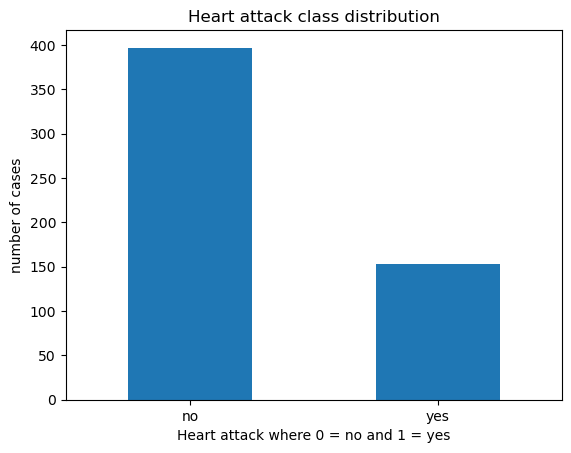

In [108]:
#Makes a new column so when there is a heart attack date it will be valued 1 and if not it's a 0 meaning no heart attack
df['Heart_Attack'] = df['Heart Attack Date'].notnull().astype(int)
df['Heart_Attack'].value_counts().plot(kind='bar')

#creates a bar chart showing the distribution heart attack vs no heart attack from the new "Heart_Attack" row
plt.title("Heart attack class distribution")
plt.xlabel("Heart attack where 0 = no and 1 = yes")
plt.ylabel("number of cases")
plt.xticks([0,1], ["no", "yes"], rotation = 0)
plt.show()


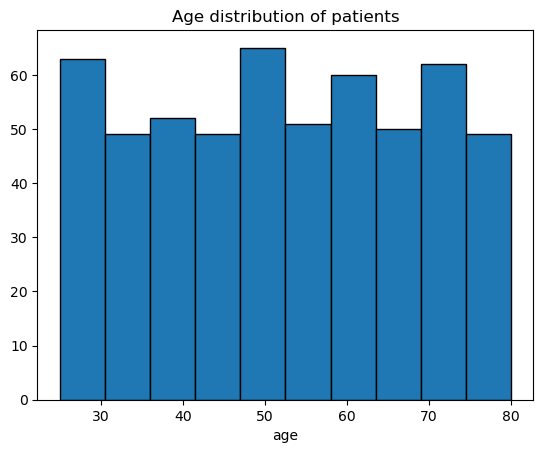

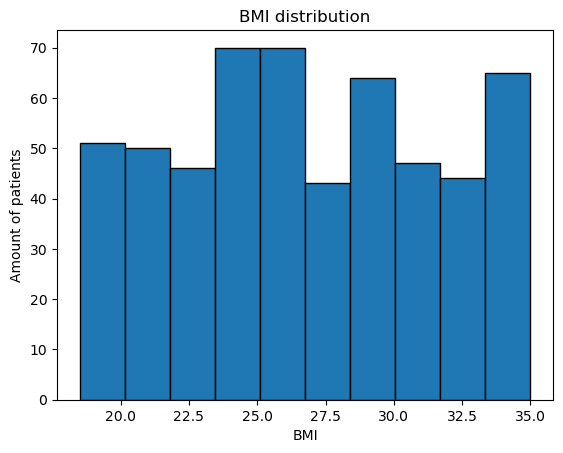

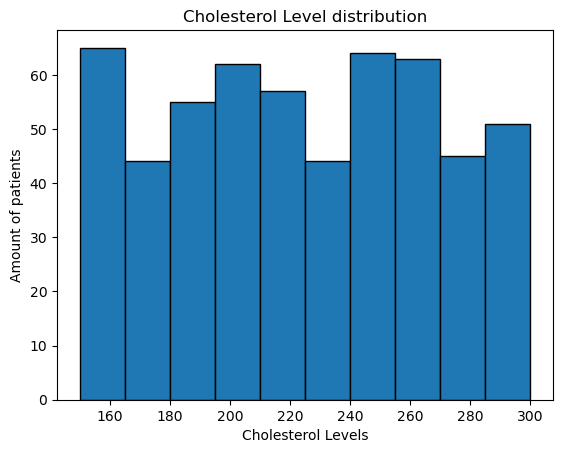

In [110]:
#Makes 3 histogram plots for visualizing the age distribution, cholestorol distribution and the BMI distribution
plt.hist(df['Age'], bins = 10, edgecolor = 'black')
plt.title("Age distribution of patients")
plt.xlabel("age")
plt.show()

plt.hist(df['BMI'], bins = 10, edgecolor = 'black')
plt.title("BMI distribution")
plt.xlabel("BMI")
plt.ylabel("Amount of patients")
plt.show()

plt.hist(df['Cholesterol Level'], bins = 10, edgecolor = 'black')
plt.title("Cholesterol Level distribution")
plt.xlabel("Cholesterol Levels")
plt.ylabel("Amount of patients")
plt.show()

In [111]:
#converts categorical variables to numerical variables that can be used for training and using the model later
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Smoking History'] = df['Smoking History'].map({'Yes': 1, 'No': 0})
df['Diabetes Status'] = df['Diabetes Status'].map({'Yes': 1, 'No': 0})
df['Outcome'] = df['Outcome'].map({'survived': 1, 'not survived': 0})
df['Vaccine Dose'] = df['Vaccine Dose'].map({'1st Dose': 1, '2nd Dose': 2, 'Booster': 3})
df['Severity'] = df['Severity'].map({'Mild': 1, 'Moderate': 2, 'Severe': 3})
df['Blood Pressure'] = df['Blood Pressure'].map({'Normal': 1, 'Elevated': 2, 'High': 3, 'Very High': 4})


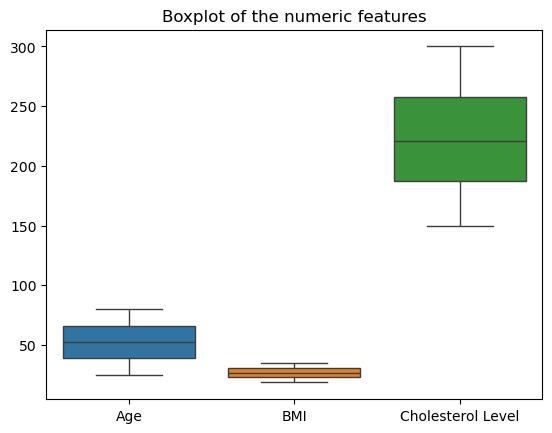

duplicates: 0


In [114]:
#here i check for duplicated rows, and if they exist they get removed
df.duplicated().sum()
df = df.drop_duplicates()

#Visualizing the numerical features and printing out the number of duplicates found
sns.boxplot(data=df[['Age', 'BMI', 'Cholesterol Level']])
plt.title("Boxplot of the numeric features")
plt.show()
print("duplicates:", df.duplicated().sum())

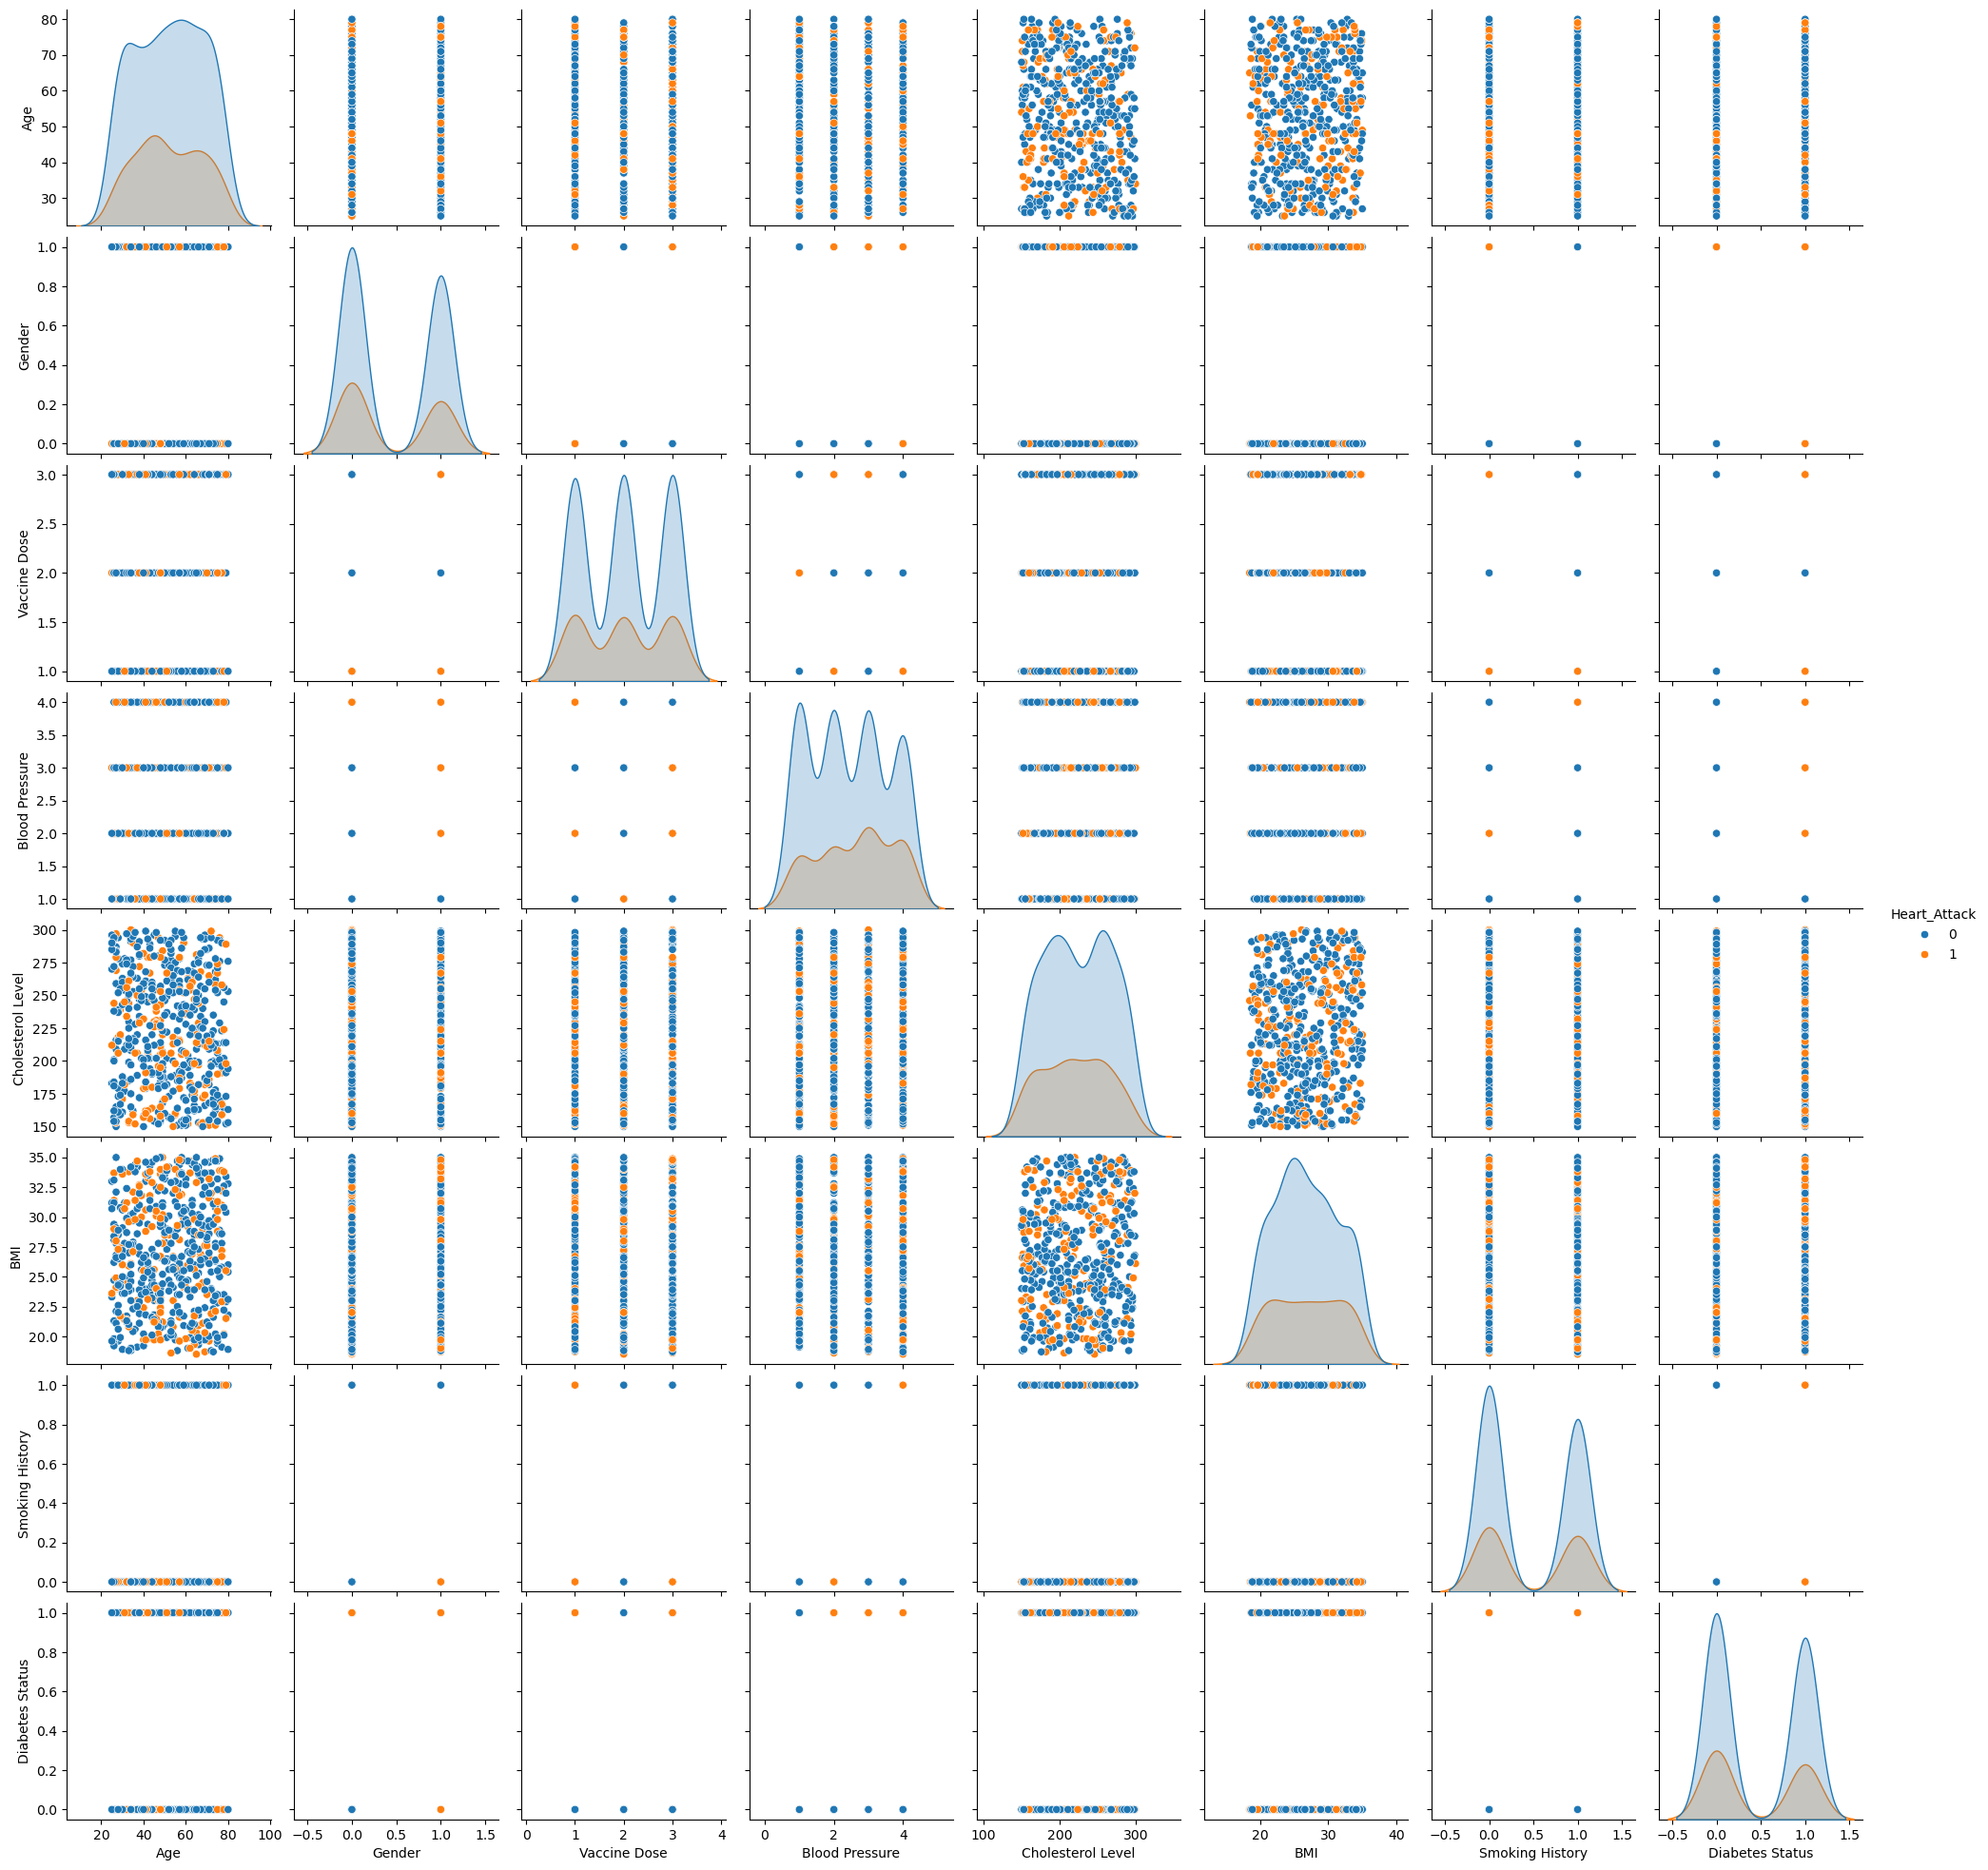

In [116]:
#pair plot visualization
myPairPlot = sns.pairplot(df, hue = 'Heart_Attack', vars = ['Age', 'Gender', 'Vaccine Dose', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Smoking History', 'Diabetes Status'],kind = 'scatter')
plt.savefig('Balle.png')

<Axes: >

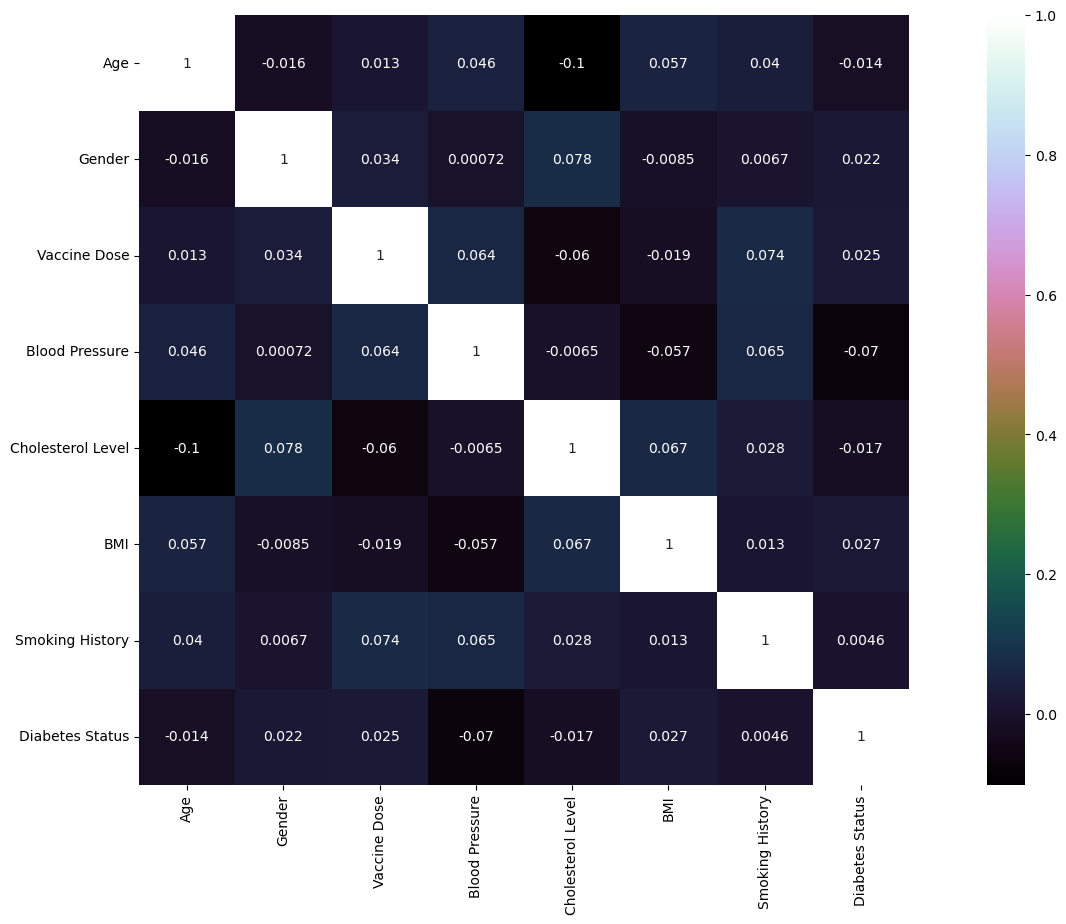

In [117]:
#calculates the Pearson correlation coefficient for the following numerical features: Age, Gender, Vaccine Dose, Blood Pressure, Cholesterol Level, BMI, Smoking History, Diabetes Status
corFig = df[['Age', 'Gender', 'Vaccine Dose', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Smoking History', 'Diabetes Status']].corr(method = 'pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corFig, vmax=1, square=True,annot = True, cmap = 'cubehelix')

In [118]:
#features and target are seperated and put into x and y
y = df['Heart_Attack']

x = df[['Age', 'Gender', 'Vaccine Dose', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Smoking History']]

In [119]:
#training the KNN model where n_neighbors = 5, then later I make the model predict using the xTest data it has not seen yet and prints the accuracy
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xTrain, yTrain)

yPrediction = knn.predict(xTest)

print("Accuracy: ", accuracy_score(yTest, yPrediction))


Accuracy:  0.7272727272727273


In [120]:
#sets up label encoder for Heart_Attack
my_class_labels_coded = preprocessing.LabelEncoder()
my_class_labels_coded.fit(df['Heart_Attack'])
print(my_class_labels_coded.classes_)

[0 1]


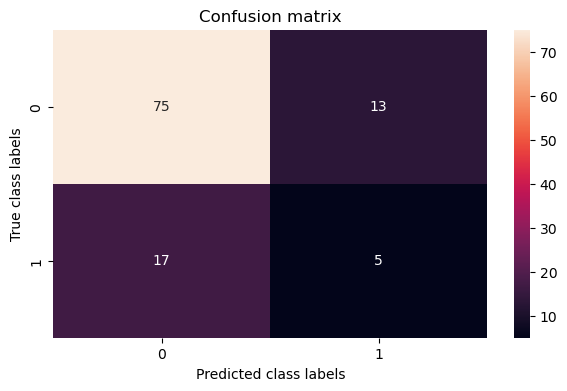

In [121]:
#creating the confusion matrix

confusionMatrix = confusion_matrix(my_class_labels_coded.inverse_transform(yTest), my_class_labels_coded.inverse_transform(yPrediction))

fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(confusionMatrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_class_labels_coded.classes_);
ax.yaxis.set_ticklabels(my_class_labels_coded.classes_);

Accuracy Tree: 0.6545454545454545
Train Accuracy: 1.0


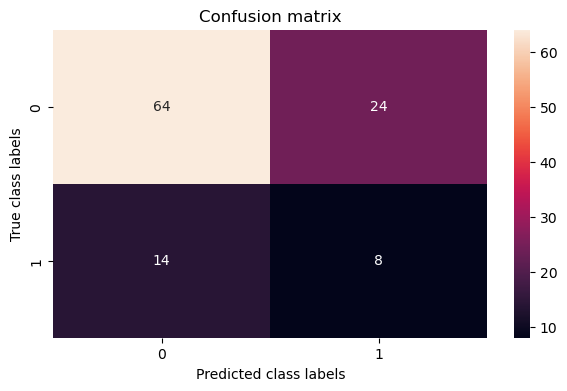

In [122]:
#making and training the model using Decision tree, then I make it predict the same data as i did with the other model and then print out the accuracy
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(xTrain,yTrain)

trainPrediction = tree.predict(xTrain)
trainAccuracy = accuracy_score(yTrain, trainPrediction)

yTreePrediction = tree.predict(xTest)

print("Accuracy Tree:", accuracy_score(yTest, yTreePrediction))

print("Train Accuracy:", trainAccuracy)

#confusion matrix 
confusionMatrix = confusion_matrix(my_class_labels_coded.inverse_transform(yTest), my_class_labels_coded.inverse_transform(yTreePrediction))

fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(confusionMatrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_class_labels_coded.classes_);
ax.yaxis.set_ticklabels(my_class_labels_coded.classes_);

Accuracy:  0.7727272727272727


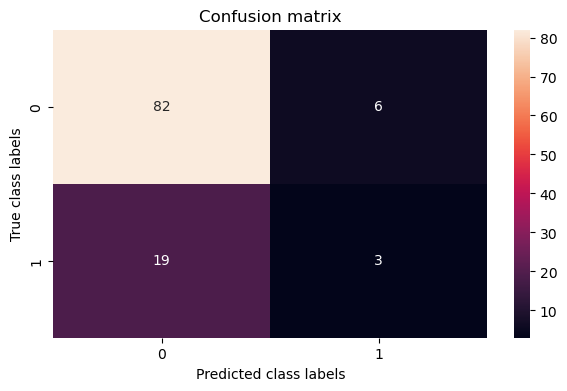

In [133]:
#making the third experiment by training a new KNN model now using n_neighbors = 5 and printing out the accuracy so we can compare the models
knn6 = KNeighborsClassifier(n_neighbors = 6)
knn6.fit(xTrain, yTrain)

yPrediction = knn6.predict(xTest)

print("Accuracy: ", accuracy_score(yTest, yPrediction))

#confusion matrix
confusionMatrix = confusion_matrix(my_class_labels_coded.inverse_transform(yTest), my_class_labels_coded.inverse_transform(yPrediction))

fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(confusionMatrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_class_labels_coded.classes_);
ax.yaxis.set_ticklabels(my_class_labels_coded.classes_);

C:\Users\eirik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


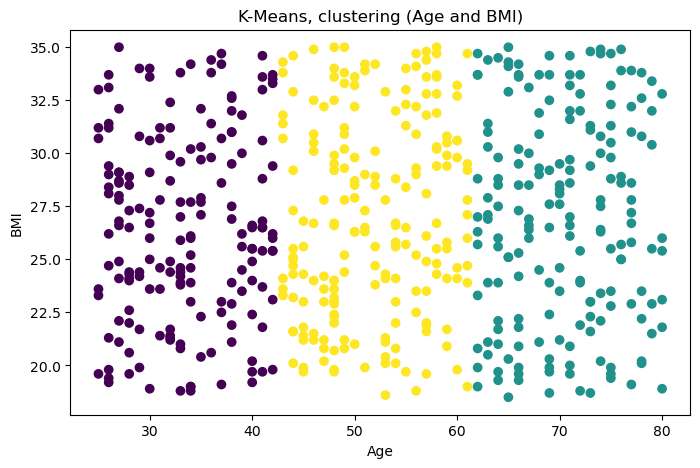

In [143]:
#uses Age and BMI for clustering
unsupervised = df[['Age', 'BMI']]

#applying K-Means with 3 clusters
kMeans = KMeans(n_clusters = 3, random_state = 42)
df['KMeansCluster'] = kMeans.fit_predict(unsupervised)

#plot the clusters
plt.figure(figsize = (8,5))
plt.scatter(df['Age'], df['BMI'], c = df['KMeansCluster'], cmap = 'viridis')
plt.title("K-Means, clustering (Age and BMI)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

In [135]:
#picks one patient from the test and not training data so it can then predict it
sample = xTest.iloc[0:1]
prediction = knn6.predict(sample)

#prints out the prediction and then the actual data after to compare the resault
print("predicted Heart attack: (1 = yes, 0 = no):", prediction[0])
print("Actual:", yTest.iloc[0])

predicted Heart attack: (1 = yes, 0 = no): 0
Actual: 0


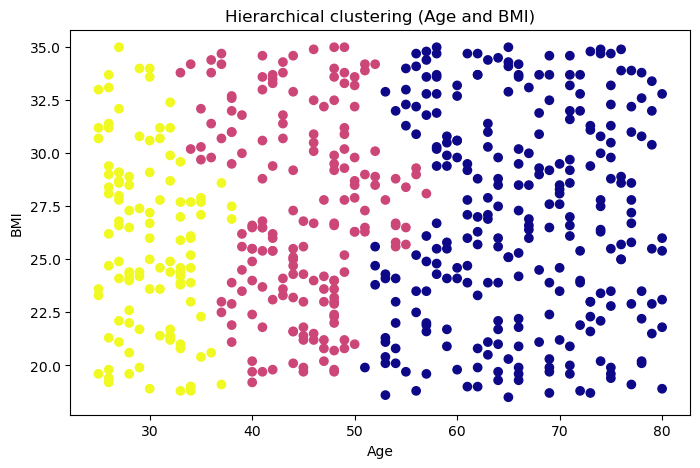

In [151]:
#using the same data (Age and BMI)
unsupervised2 = df[['Age', 'BMI']]

#applying hierarchical clustering with 3 clusters
hierarchical = AgglomerativeClustering(n_clusters = 3)
df['HierarchicalCluster'] = hierarchical.fit_predict(unsupervised2)

#plotting
plt.figure(figsize = (8,5))
plt.scatter(df['Age'], df['BMI'], c = df['HierarchicalCluster'], cmap = 'plasma')
plt.title("Hierarchical clustering (Age and BMI)")
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()